In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Working with real data

We provide a dataset describing the hospital charges associated with a set of patients, and the variables that might explain these charges. The dataset is stored in a file called "hospital_charge.csv". The variables in the dataset are:

- age: age of primary beneficiary

- sex: insurance contractor gender (female/ male)

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight $(kg / m^2)$ using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance 

- smoker: Smoking (yes / no)

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [2]:
# Load data from the csv file, using the pandas library
data = pd.read_csv('hospital_charges.csv')

### Explore the dataset: it is a pandas dataframe, which has many useful tools

In [3]:
# Display the first 5 rows of the data
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# Our goal is to predict hospital charges for incoming patients

- $Y$ is the target variable, based on the "charges" columns

- Covariates of interest, ($X$) are the rest of the columns

- We think that the expected value of charges depends on the values of such covariates.

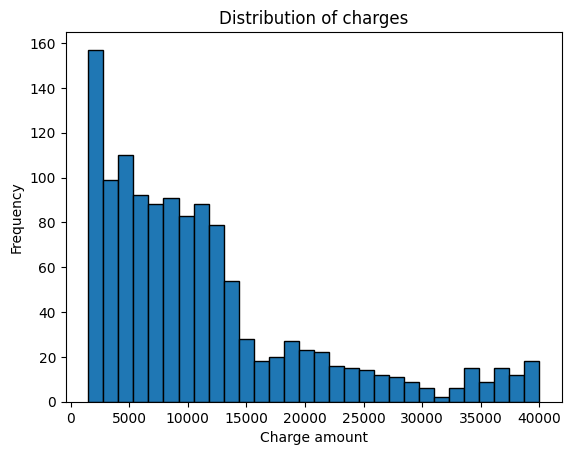

In [4]:
data.charges.plot(kind='hist', bins=30, edgecolor='black')
plt.xlabel('Charge amount')
plt.ylabel('Frequency')
plt.title('Distribution of charges')
plt.show()

## What distribution does Y have?

- Is it a Normal? A Bernoulli? or something else?

- Can you think of a transformation that might make it look more like a known distribution?


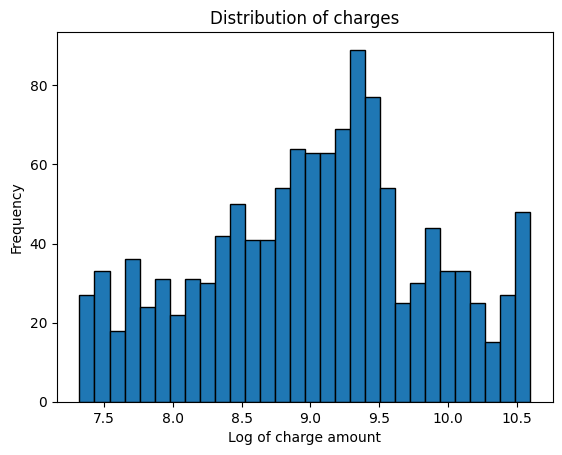

In [5]:
# Let us transform the data to a log scale
data['charges_log'] = np.log(data.charges)
data.charges_log.plot(kind='hist', bins=30, edgecolor='black')
plt.xlabel('Log of charge amount')
plt.ylabel('Frequency')
plt.title('Distribution of charges')
plt.show()

In [6]:
# Let us calculate the mean and standard deviation of the original and log-transformed data
mean_original = data.charges.mean()
std_original = data.charges.std()
mean_log = data.charges_log.mean()
std_log = data.charges_log.std()

print('Mean of original data:', mean_original)
print('Standard deviation of original data:', std_original)
print('Mean of log-transformed data:', mean_log)
print('Standard deviation of log-transformed data:', std_log)

Mean of original data: 11398.67308067716
Standard deviation of original data: 9167.254979585408
Mean of log-transformed data: 9.027396546895707
Standard deviation of log-transformed data: 0.82074871415089


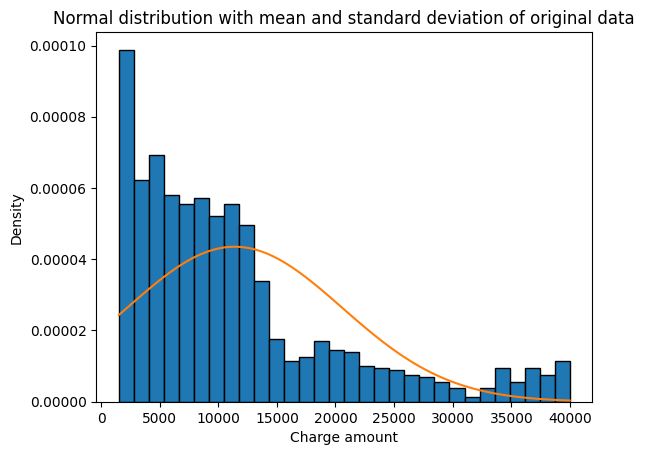

In [7]:
# Let us plot the normal distribution with the mean and standard deviation of the original data
# On top of the histogram of the original data
data.charges.plot(kind='hist', bins=30, edgecolor='black', density=True)
# The normal distribution defined by the mean and standard deviation of the original data
x = np.linspace(data.charges.min(), data.charges.max(), 100)
y = stats.norm.pdf(x, mean_original, std_original)
plt.plot(x, y)
plt.xlabel('Charge amount')
plt.ylabel('Density')
plt.title('Normal distribution with mean and standard deviation of original data')
plt.show()

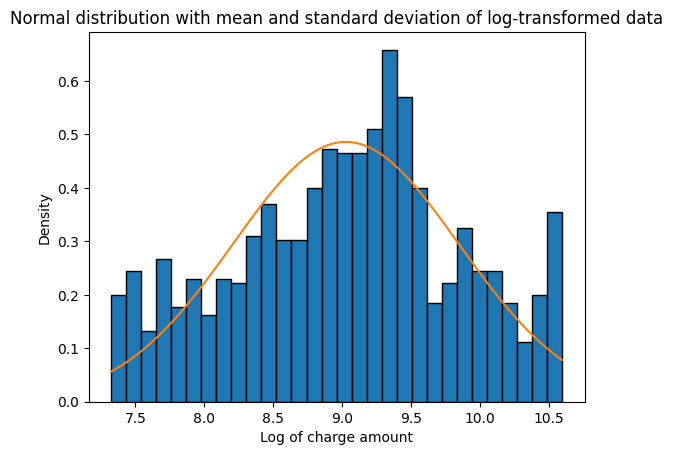

In [8]:
# Let us plot the normal distribution with the mean and standard deviation of the log-transformed data
# On top of the histogram of the log-transformed data
data.charges_log.plot(kind='hist', bins=30, edgecolor='black', density=True)
# The normal distribution defined by the mean and standard deviation of the log-transformed data
x = np.linspace(data.charges_log.min(), data.charges_log.max(), 100)
y = stats.norm.pdf(x, mean_log, std_log)
plt.plot(x, y)
plt.xlabel('Log of charge amount')
plt.ylabel('Density')
plt.title('Normal distribution with mean and standard deviation of log-transformed data')
plt.show()

## What types of covariates do you have?

- Are they continuous, categorical, binary?

In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'charges_log'],
      dtype='object')

In [10]:
# Let us summarize the data
data.describe()

,age,bmi,children,charges,charges_log
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,38.932203,30.248975,1.099274,11398.673081,9.027397
std,13.898731,5.941710,1.210745,9167.254980,0.820749
min,18.000000,15.960000,0.000000,1515.344900,7.323398
25%,26.000000,25.917500,0.000000,4687.092850,8.452568
50%,39.000000,29.920000,1.000000,8891.139500,9.092810
75%,51.000000,34.100000,2.000000,14001.210250,9.546899
max,64.000000,50.380000,5.000000,39983.425950,10.596220


In [11]:
# Let us look at the non-numerical data
data.describe(include='object')

,sex,smoker,region
count,1239,1239,1239
unique,2,2,4
top,female,no,southeast
freq,630,1044,317


In [12]:
# Let us transform the categorical data to numerical data, in a different column
data['smoker_num'] = data.smoker.map({'no': 0, 'yes': 1})
data['region_num'] = data.region.map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})
data['sex'] = data.sex.map({'male':0, 'female':1})


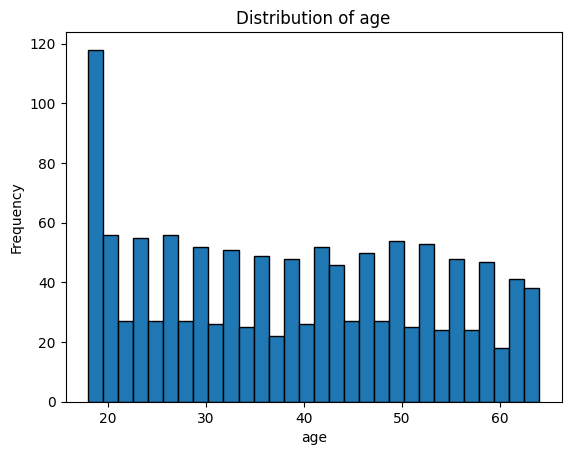

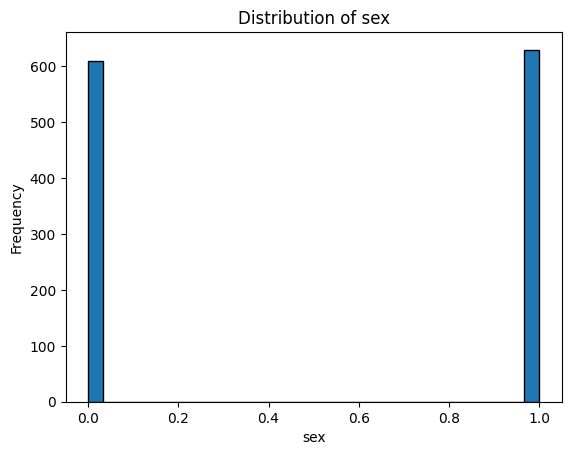

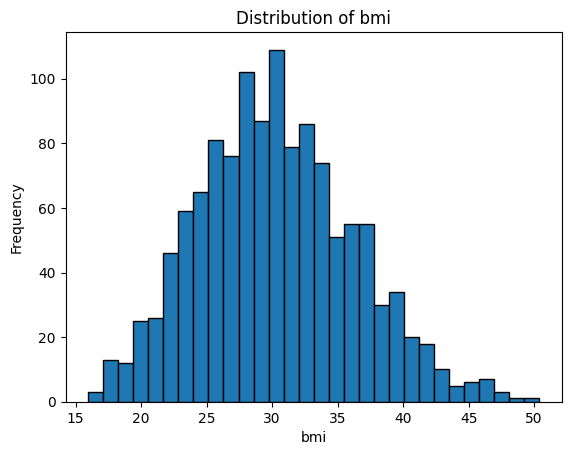

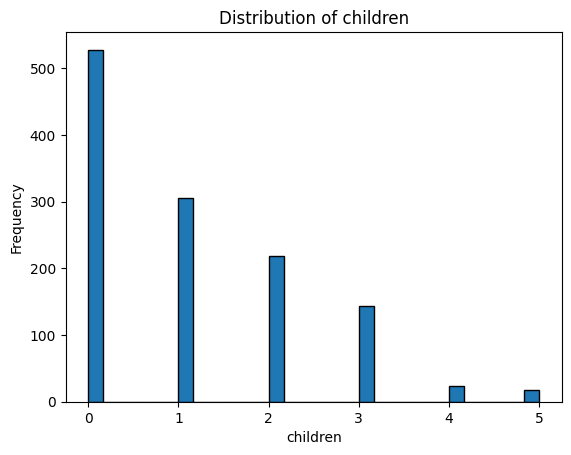

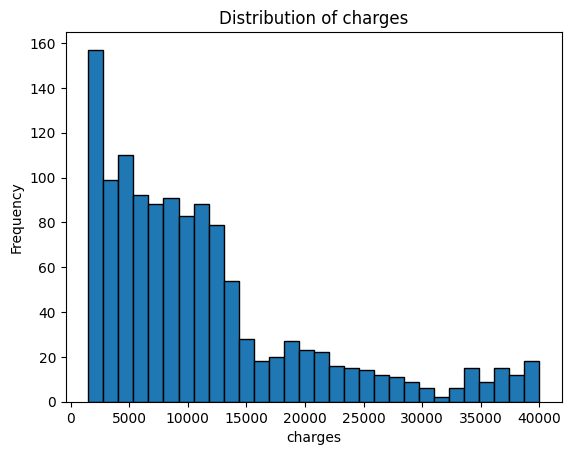

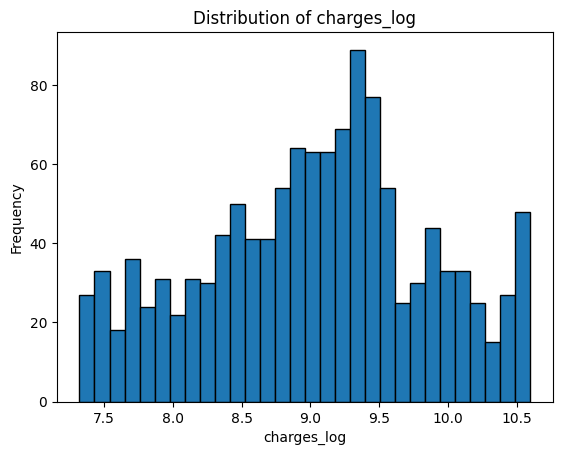

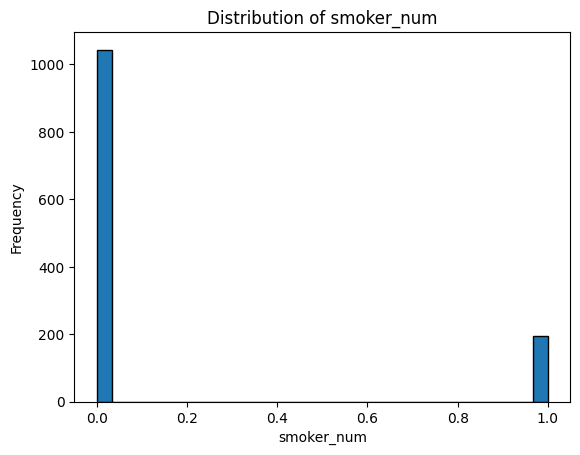

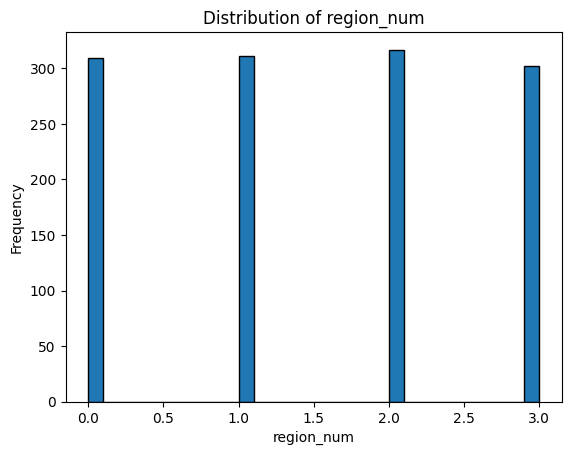

In [13]:
# Let us plot the histogram over each of the features, i.e., the columns of the data
for column in data.columns:
    # Skip the column if it is not numerical
    if data[column].dtype == 'object':
        continue
    
    data[column].plot(kind='hist', bins=30, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + column)
    plt.show()


## Do you think it makes sense to do a regression to predict $Y$ from $X$?

- If so, what model do you want to use?

In [14]:
# Let us define the features, as all the numerical columns of the data
X_df = data[
    ['age', 'sex', 'bmi', 'children', 'smoker_num', 'region_num']
]

# Let us keep track of column names and get the values as numpy array
column_names = X_df.columns
X = X_df.values

# Let us define the target variable, as numpy array
y = data.charges.values


In [15]:
y.shape, X.shape

((1239,), (1239, 6))

In [16]:
# Let us fit a linear regression model to the data, based on skit-learn
from sklearn.linear_model import LinearRegression

# Create a linear regression object
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Let us print the coefficients of the model
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('Column names:', column_names)

Intercept: -6474.056178389052
Coefficients: [ 2.18905998e+02  5.34074695e+00  2.07520846e+02  4.05778384e+02
  1.96483231e+04 -3.13387797e+02]
Column names: Index(['age', 'sex', 'bmi', 'children', 'smoker_num', 'region_num'], dtype='object')


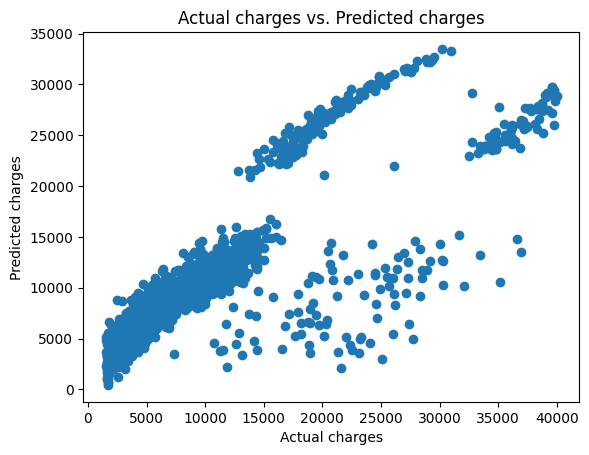

In [17]:
# Let us plot the predicted charges against the actual charges
y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual charges vs. Predicted charges')
plt.show()

In [18]:
# Let us replicate the above analysis, but with the log-transformed target variable
# Let us define the target variable, as numpy array
y_log = data.charges_log.values

# Let us fit a linear regression model to the data, based on skit-learn
log_model = LinearRegression()

# Fit the model to the data
log_model.fit(X, y_log)

# Let us print the coefficients of the model
print('Intercept:', log_model.intercept_)
print('Coefficients:', log_model.coef_)
print('Column names:', column_names)

Intercept: 6.998176128727049
Coefficients: [ 0.03435177  0.04517696  0.0126173   0.09487402  1.53896521 -0.03969638]
Column names: Index(['age', 'sex', 'bmi', 'children', 'smoker_num', 'region_num'], dtype='object')


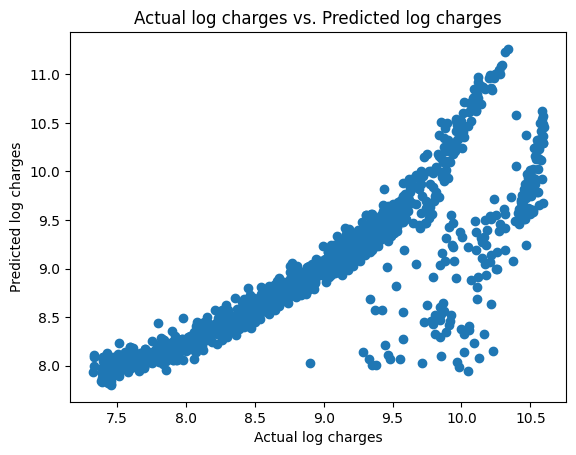

In [19]:
# Let us plot the predicted charges against the actual charges
y_pred_log = log_model.predict(X)
plt.scatter(y_log, y_pred_log)
plt.xlabel('Actual log charges')
plt.ylabel('Predicted log charges')
plt.title('Actual log charges vs. Predicted log charges')
plt.show()

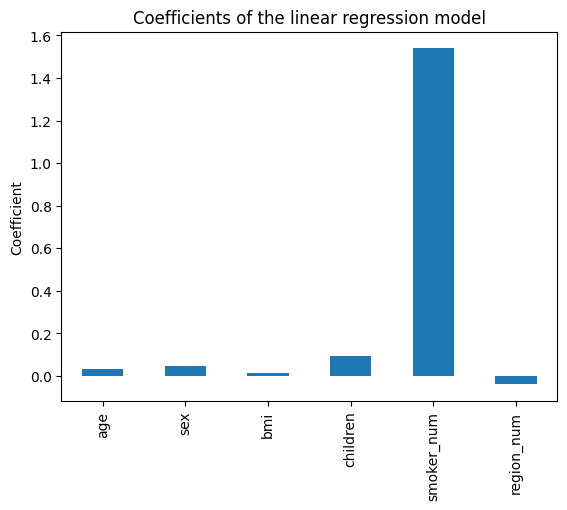

In [20]:
# Let us check the coefficients of the model, to see which features are most important
coefficients = pd.Series(log_model.coef_, column_names)
coefficients.plot(kind='bar')
plt.ylabel('Coefficient')
plt.title('Coefficients of the linear regression model')
plt.show()

In [21]:
# Let us compute the MSE of the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_log, y_pred_log)
print('Mean squared error:', mse)

Mean squared error: 0.19423409316800327


In [27]:
# Let us replicate the analysis, but removing non-significant features
X_df = data[
    #['age', 'sex', 'children', 'smoker_num']
    ['age', 'smoker_num']
]

# Let us keep track of column names and get the values as numpy array
column_names = X_df.columns
X = X_df.values

In [28]:
# Let us fit a linear regression model to the log-charges again
log_model_simple = LinearRegression()

# Fit the model to the data
log_model_simple.fit(X, y_log)

# Let us print the coefficients of the model
print('Intercept:', log_model_simple.intercept_)
print('Coefficients:', log_model_simple.coef_)
print('Column names:', column_names)

Intercept: 7.4310929116096975
Coefficients: [0.03492941 1.50220597]
Column names: Index(['age', 'smoker_num'], dtype='object')


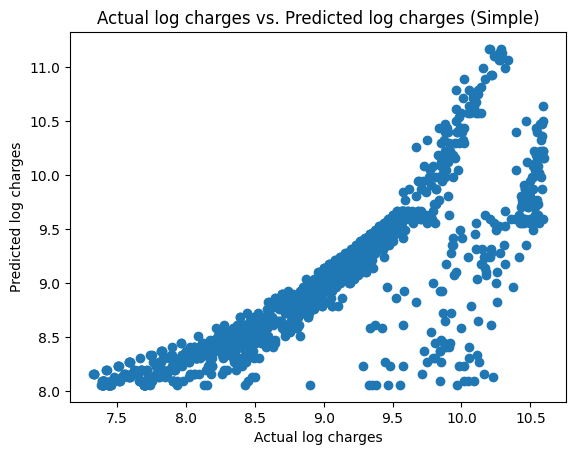

In [29]:
# Let us plot the predicted charges against the actual charges
y_pred_log_simple = log_model_simple.predict(X)
plt.scatter(y_log, y_pred_log_simple)
plt.xlabel('Actual log charges')
plt.ylabel('Predicted log charges')
plt.title('Actual log charges vs. Predicted log charges (Simple)')
plt.show()

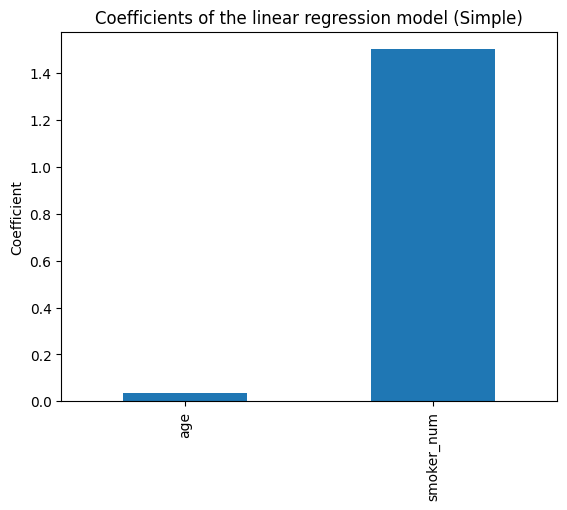

In [30]:
# Let us plot the coefficients of the model
coefficients = pd.Series(log_model_simple.coef_, column_names)
coefficients.plot(kind='bar')
plt.ylabel('Coefficient')
plt.title('Coefficients of the linear regression model (Simple)')
plt.show()

In [31]:
# Let us compute the MSE of this simple model
mse_simple = mean_squared_error(y_log, y_pred_log_simple)
print('Mean squared error (Simple):', mse_simple)

Mean squared error (Simple): 0.21369122482207561
